In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
plt.style.use('bmh')

In [2]:
print("1.Apple\n2.AMAZON\n3.SENSEX\n4.Google\n5.MICROSOFT\n6.NETFLIX\n7.NIFTY\n8.Walmart")
ch=int(input("Enter your choice:"))
file=""
name=""
sign="USD ($)"
if(ch==1):
    file="AAPL.csv"
    name="Apple"
elif(ch==2):
    file="AMZN.csv"
    name="Amazon"
elif(ch==3):
    file="BSESN.csv"
    name="Sensex"
elif(ch==4):
    file="GOOG.csv"
    name="Google"
elif(ch==5):
    file="MSFT.csv"
    name="Microsoft"
elif(ch==6):
    file="NFLX.csv"
    name="Netflix"
elif(ch==7):
    file="NSEI.csv"
    name="NIFTY"
else:
    file="WMT.csv"
    name="Walmart"
if(ch==3 or ch==7):
    sign="INR (Rs)"

1.Apple
2.AMAZON
3.SENSEX
4.Google
5.MICROSOFT
6.NETFLIX
7.NIFTY
8.Walmart
Enter your choice:1


In [3]:
data = pd.read_csv(file)
data.head(5)

Date        Open        High         Low       Close   Adj Close  \
0  2015-01-02  111.389999  111.440002  107.349998  109.330002   99.945885   
1  2015-01-05  108.290001  108.650002  105.410004  106.250000   97.130241   
2  2015-01-06  106.540001  107.430000  104.629997  106.260002   97.139420   
3  2015-01-07  107.199997  108.199997  106.699997  107.750000   98.501518   
4  2015-01-08  109.230003  112.150002  108.699997  111.889999  102.286186   

     Volume  
0  53204600  
1  64285500  
2  65797100  
3  40105900  
4  59364500

In [4]:
data.shape

(1361, 7)

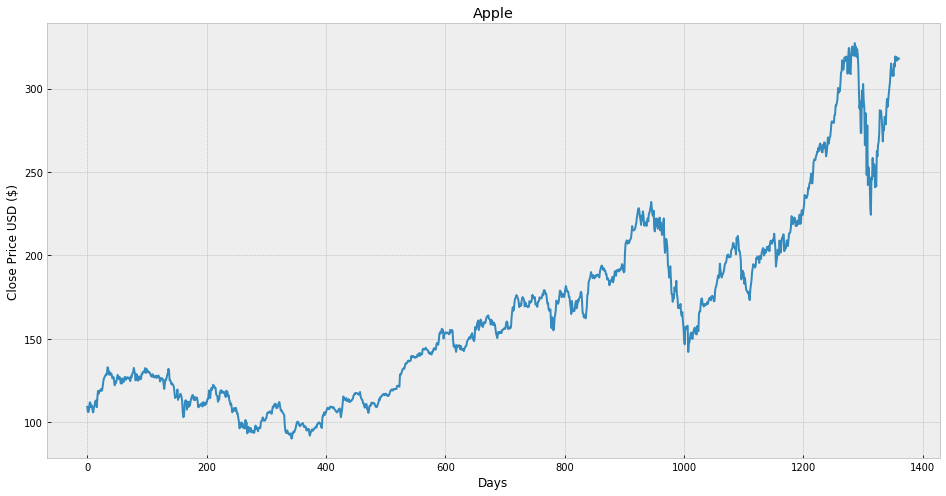

In [5]:
plt.figure(figsize=(16,8))
plt.title(name)
plt.xlabel('Days')
plt.ylabel('Close Price '+sign)
plt.plot(data['Close'])
plt.show()

In [6]:
data=data[['Close']]
data.head(4)

Close
0  109.330002
1  106.250000
2  106.260002
3  107.750000

In [7]:
future_days=25
data['Prediction Close']=data[['Close']].shift(-future_days)
data.tail(27)

Close  Prediction Close
1334  276.100006        318.250000
1335  275.029999        317.940002
1336  282.970001               NaN
1337  283.170013               NaN
1338  278.579987               NaN
1339  287.730011               NaN
1340  293.799988               NaN
1341  289.070007               NaN
1342  293.160004               NaN
1343  297.559998               NaN
1344  300.630005               NaN
1345  303.739990               NaN
1346  310.130005               NaN
1347  315.010010               NaN
1348  311.410004               NaN
1349  307.649994               NaN
1350  309.540009               NaN
1351  307.709991               NaN
1352  314.959991               NaN
1353  313.140015               NaN
1354  319.230011               NaN
1355  316.850006               NaN
1356  318.890015               NaN
1357  316.730011               NaN
1358  318.109985               NaN
1359  318.250000               NaN
1360  317.940002               NaN

In [8]:
X=np.array(data.drop(['Prediction Close'],1))[:-future_days]
X

array([[109.330002],
       [106.25    ],
       [106.260002],
       ...,
       [268.369995],
       [276.100006],
       [275.029999]])

In [9]:
y=np.array(data['Prediction Close'])[:-future_days]
y

array([119.720001, 122.019997, 124.879997, ..., 318.109985, 318.25    ,
       317.940002])

In [10]:
#Split the data into 80% training and 20% testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [11]:
#Create the models
#Create the decision tree regressor model
accuracy=[]
for i in range(1,10):
    tree=DecisionTreeRegressor(max_depth=i).fit(X_train,y_train)
    accuracy.append(tree.score(X_test,y_test))
n=accuracy.index(max(accuracy))+1
tree=DecisionTreeRegressor(max_depth=n).fit(X_train,y_train)
#Create the linear regression model
lr=LinearRegression().fit(X_train,y_train)
#Create the k nearesmodelt neighbor 
accuracy=[]
for i in range(1,50):
    neigh=KNeighborsRegressor(n_neighbors=i).fit(X_train,y_train)
    accuracy.append(neigh.score(X_test,y_test))
n=accuracy.index(max(accuracy))+1
neigh=KNeighborsRegressor(n_neighbors=n).fit(X_train,y_train)
#Create the random forest model
accuracy=[]
for i in range(1,10):
    forest = RandomForestRegressor(max_depth=i).fit(X_train,y_train)
    accuracy.append(forest.score(X_test,y_test))
n=accuracy.index(max(accuracy))+1
forest = RandomForestRegressor(max_depth=n).fit(X_train,y_train)

In [12]:
x_future=data.drop(['Prediction Close'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[244.779999],
       [229.240005],
       [224.369995],
       [246.880005],
       [245.520004],
       [258.440002],
       [247.740005],
       [254.809998],
       [254.289993],
       [240.910004],
       [244.929993],
       [241.410004],
       [262.470001],
       [259.429993],
       [266.070007],
       [267.98999 ],
       [273.25    ],
       [287.049988],
       [284.429993],
       [286.690002],
       [282.799988],
       [276.929993],
       [268.369995],
       [276.100006],
       [275.029999]])

In [13]:
#Show the model tree prediction
tree_prediction=tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction=lr.predict(x_future)
print(lr_prediction)
print()
#Show the model k nearest neighbor prediction
knn_prediction=neigh.predict(x_future)
print(knn_prediction)
print()
#Show the model random forest prediction
forest_prediction=forest.predict(x_future)
print(forest_prediction)

[274.613847   235.41529576 235.41529576 274.613847   274.613847
 299.07564371 274.613847   274.613847   274.613847   274.613847
 274.613847   274.613847   299.07564371 299.07564371 299.07564371
 299.07564371 299.07564371 299.07564371 299.07564371 299.07564371
 299.07564371 299.07564371 299.07564371 299.07564371 299.07564371]

[247.94984863 232.45402095 227.59785204 250.04388619 248.68775046
 261.57102845 250.90144198 257.95134131 257.43281422 244.09085257
 248.09941633 244.58943152 265.58957376 262.55820579 269.17934816
 271.09387437 276.33893486 290.09970183 287.48715313 289.74073894
 285.86178078 280.00846893 271.47279935 279.18084084 278.11387491]

[275.18478396 234.66347935 220.76695587 276.02043483 275.18478396
 287.62304017 276.97565226 283.00043252 283.00043252 272.12260974
 275.18478396 272.12260974 290.52347461 287.62304017 297.07217004
 297.64564839 303.123478   304.21174157 302.72826352 300.94652391
 302.45391578 306.25174078 297.64564839 304.82347965 306.23782739]

[280.889

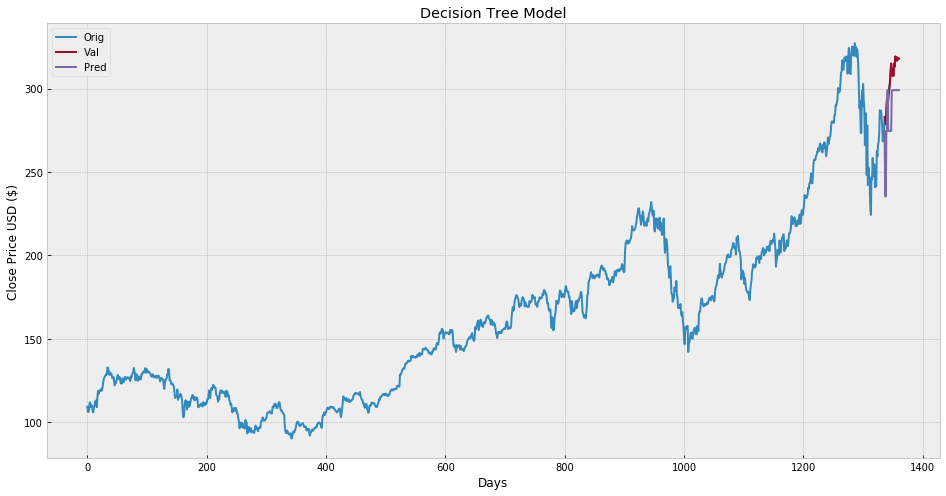

In [14]:
#Visulaize the tree prediction
predictions=tree_prediction
valid=data[X.shape[0]:]
valid['Prediction Close']=predictions
plt.figure(figsize=(16,8))
plt.title('Decision Tree Model')
plt.xlabel('Days')
plt.ylabel('Close Price '+sign)
plt.plot(data['Close'])
plt.plot(valid[['Close','Prediction Close']])
plt.legend(['Orig','Val','Pred'])
plt.show()

In [15]:
valid

Close  Prediction Close
1336  282.970001        274.613847
1337  283.170013        235.415296
1338  278.579987        235.415296
1339  287.730011        274.613847
1340  293.799988        274.613847
1341  289.070007        299.075644
1342  293.160004        274.613847
1343  297.559998        274.613847
1344  300.630005        274.613847
1345  303.739990        274.613847
1346  310.130005        274.613847
1347  315.010010        274.613847
1348  311.410004        299.075644
1349  307.649994        299.075644
1350  309.540009        299.075644
1351  307.709991        299.075644
1352  314.959991        299.075644
1353  313.140015        299.075644
1354  319.230011        299.075644
1355  316.850006        299.075644
1356  318.890015        299.075644
1357  316.730011        299.075644
1358  318.109985        299.075644
1359  318.250000        299.075644
1360  317.940002        299.075644

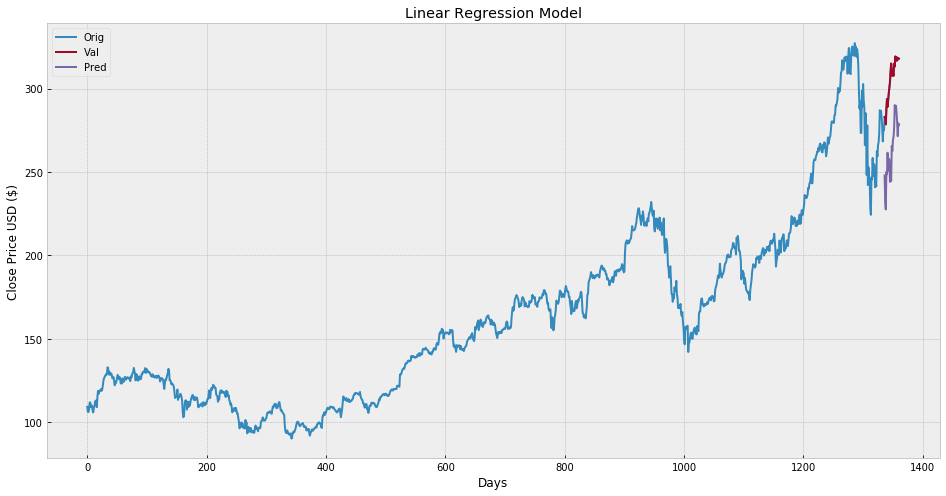

In [16]:
#Visulaize the linear regression prediction
predictions=lr_prediction
valid=data[X.shape[0]:]
valid['Prediction Close']=predictions
plt.figure(figsize=(16,8))
plt.title('Linear Regression Model')
plt.xlabel('Days')
plt.ylabel('Close Price '+sign)
plt.plot(data['Close'])
plt.plot(valid[['Close','Prediction Close']])
plt.legend(['Orig','Val','Pred'])
plt.show()

In [17]:
valid

Close  Prediction Close
1336  282.970001        247.949849
1337  283.170013        232.454021
1338  278.579987        227.597852
1339  287.730011        250.043886
1340  293.799988        248.687750
1341  289.070007        261.571028
1342  293.160004        250.901442
1343  297.559998        257.951341
1344  300.630005        257.432814
1345  303.739990        244.090853
1346  310.130005        248.099416
1347  315.010010        244.589432
1348  311.410004        265.589574
1349  307.649994        262.558206
1350  309.540009        269.179348
1351  307.709991        271.093874
1352  314.959991        276.338935
1353  313.140015        290.099702
1354  319.230011        287.487153
1355  316.850006        289.740739
1356  318.890015        285.861781
1357  316.730011        280.008469
1358  318.109985        271.472799
1359  318.250000        279.180841
1360  317.940002        278.113875

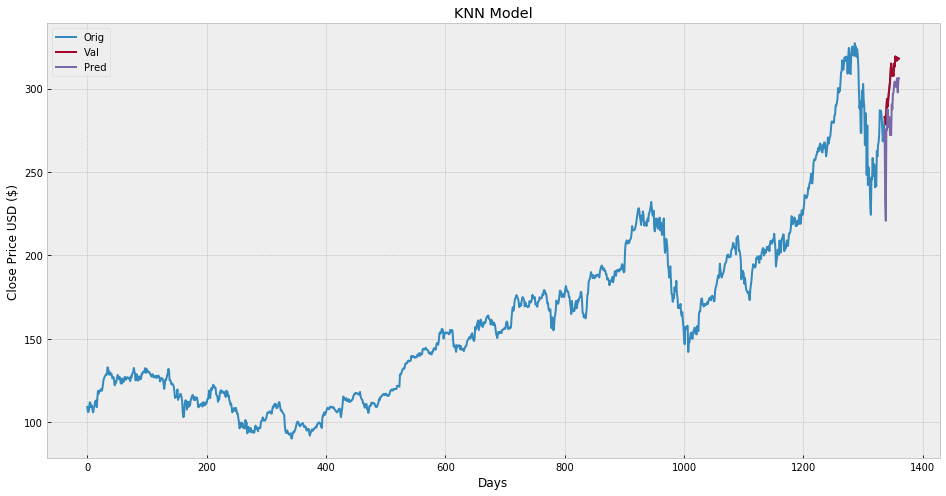

In [18]:
#Visulaize the k nearest neighbor prediction
predictions=knn_prediction
valid=data[X.shape[0]:]
valid['Prediction Close']=predictions
plt.figure(figsize=(16,8))
plt.title('KNN Model')
plt.xlabel('Days')
plt.ylabel('Close Price '+sign)
plt.plot(data['Close'])
plt.plot(valid[['Close','Prediction Close']])
plt.legend(['Orig','Val','Pred'])
plt.show()

In [19]:
valid

Close  Prediction Close
1336  282.970001        275.184784
1337  283.170013        234.663479
1338  278.579987        220.766956
1339  287.730011        276.020435
1340  293.799988        275.184784
1341  289.070007        287.623040
1342  293.160004        276.975652
1343  297.559998        283.000433
1344  300.630005        283.000433
1345  303.739990        272.122610
1346  310.130005        275.184784
1347  315.010010        272.122610
1348  311.410004        290.523475
1349  307.649994        287.623040
1350  309.540009        297.072170
1351  307.709991        297.645648
1352  314.959991        303.123478
1353  313.140015        304.211742
1354  319.230011        302.728264
1355  316.850006        300.946524
1356  318.890015        302.453916
1357  316.730011        306.251741
1358  318.109985        297.645648
1359  318.250000        304.823480
1360  317.940002        306.237827

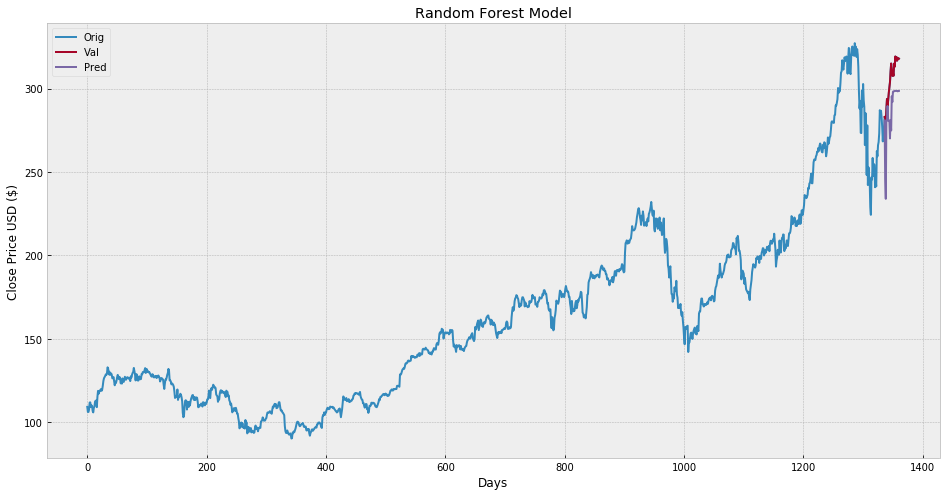

In [20]:
#Visulaize the random forest prediction
predictions=forest_prediction
valid=data[X.shape[0]:]
valid['Prediction Close']=predictions
plt.figure(figsize=(16,8))
plt.title('Random Forest Model')
plt.xlabel('Days')
plt.ylabel('Close Price '+sign)
plt.plot(data['Close'])
plt.plot(valid[['Close','Prediction Close']])
plt.legend(['Orig','Val','Pred'])
plt.show()

In [21]:
valid

Close  Prediction Close
1336  282.970001        280.889664
1337  283.170013        246.285917
1338  278.579987        233.956053
1339  287.730011        280.889664
1340  293.799988        280.889664
1341  289.070007        289.536233
1342  293.160004        280.889664
1343  297.559998        280.889664
1344  300.630005        280.889664
1345  303.739990        270.140995
1346  310.130005        280.889664
1347  315.010010        274.918972
1348  311.410004        295.356190
1349  307.649994        291.909216
1350  309.540009        298.121638
1351  307.709991        298.362418
1352  314.959991        298.362418
1353  313.140015        298.604720
1354  319.230011        298.604720
1355  316.850006        298.604720
1356  318.890015        298.604720
1357  316.730011        298.604720
1358  318.109985        298.362418
1359  318.250000        298.604720
1360  317.940002        298.604720

In [22]:
print("The accuracy of Decision Tree Regression Model is :")
tree.score(X_test,y_test)

The accuracy of Decision Tree Regression Model is :


0.942073032698278

In [23]:
print("The accuracy of Logistic Regression Model is :")
lr.score(X_test,y_test)

The accuracy of Logistic Regression Model is :


0.917062064773678

In [24]:
print("The accuracy of K Nearest Neighbor Model is :")
neigh.score(X_test,y_test)

The accuracy of K Nearest Neighbor Model is :


0.9450957426879044

In [25]:
print("The accuracy of Random Forest Model is :")
forest.score(X_test,y_test)

The accuracy of Random Forest Model is :


0.944192437552519